## IBM Quantum Challenge Fall 2021
# Challenge 2: Calculate bandgap of OLED molecules

<div class="alert alert-block alert-info">
    
We recommend that you switch to **light** workspace theme under the Account menu in the upper right corner for optimal experience.

## Introduction

Organic Light Emitting Diodes or OLEDs have become increasingly popular in recent years as the basis for fabrication of thin, flexible TV and mobile phone displays that emit light upon application of an electric current. Recent studies ([**Gao et al., 2021**](https://www.nature.com/articles/s41524-021-00540-6)) have been looking at electronic transitions of high energy states in phenylsulfonyl-carbazole (PSPCz) molecules, which could be useful thermally activated delayed fluorescence (TADF) emitters for OLED technology. TADF emitters could potentially produce OLEDs that perform with 100 percent internal quantum efficiency (IQE), i.e the fraction of the charge carriers in a circuit or system that emit absorbed photons, compared with conventional fluorophores currently used to make OLEDs whose quantum efficiencies are limited to 25 percent. That large boost in efficiency means manufacturers could produce OLEDs for use in devices requiring low-power consumption, such as cell phones, which could in turn lead to future developments where virtually any surface can be converted into a cheap and energy-efficient lighting source covering vast areas of homes, offices, museums and more!

<center><img src="resources/JSR_img6_1920w.jpg" width="600"></center>

### Why quantum?

Quantum computers could be invaluable tools for studying the electronic structure and dynamical properties of complex molecules and materials as it makes more sense to model quantum mechanical systems on a quantum device than on a classical computer. A recent joint research project by IBM Quantum and partners was successful in developing methods to improve accuracy for the calculation of excited TADF states for efficient OLEDs, making it the world's first research case of applying quantum computers to the calculation of excited states of commercial materials (see paper linked above for reference). 
    
With this background information, we are interested in describing quantum computations of the “excited states,” or high energy states, of industrial chemical compounds that could potentially be used in the fabrication of efficient OLED devices.

## Challenge

<div class="alert alert-block alert-success">

**Goal**

The goal of this challenge is to use quantum algorithms to reliably predict the excited states energies of these TADF materials. Along the way, this challenge introduces state-of-the-art hybrid classical-quantum embedded chemistry modelling allowing the splitting of the work-load between classical approximations and more accurate quantum calculations. 
    
1. **Challenge 2a & 2b**: Understanding the atomic orbitals (AO), molecular orbitals (MO) and how to reduce the number of orbitals using active space transformation.
2. **Challenge 2c & 2d**: Calculating ground state energy of PSPCz molecule using NumPy and Variational Quantum Eigensolver (VQE).
3. **Challenge 2e**: Calculating excited state energy of PSPCz module using quantum Equation-of-Motion (QEOM) algorithm.
4. **Challenge 2f**: Running VQE on the cloud (simulator or real quantum system) using Qiskit Runtime.

</div>

<div class="alert alert-block alert-info">

Before you begin, we recommend watching the [**Qiskit Nature Demo Session with Max Rossmannek**](https://youtu.be/UtMVoGXlz04?t=38) and check out the corresponding [**demo notebook**](https://github.com/qiskit-community/qiskit-application-modules-demo-sessions/tree/main/qiskit-nature) to learn how to define electronic structure calculations.

</div>

### 1. Driver

The interfaces to the classical chemistry codes that are available in Qiskit are called drivers. We have for example `PSI4Driver`, `PyQuanteDriver`, `PySCFDriver` are available.

By running a driver (Hartree-Fock calculation for a given basis set and molecular geometry), in the cell below, we obtain all the necessary information about our molecule to apply then a quantum algorithm.

In [24]:
from qiskit_nature.drivers import Molecule
from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem

# PSPCz molecule
geometry = [['C', [  -0.2316640,    1.1348450,    0.6956120]],
            ['C', [  -0.8886300,    0.3253780,   -0.2344140]],
            ['C', [  -0.1842470,   -0.1935670,   -1.3239330]],
            ['C', [   1.1662930,    0.0801450,   -1.4737160]],
            ['C', [   1.8089230,    0.8832220,   -0.5383540]],
            ['C', [   1.1155860,    1.4218050,    0.5392780]],
            ['S', [   3.5450920,    1.2449890,   -0.7349240]],
            ['O', [   3.8606900,    1.0881590,   -2.1541690]],
            ['C', [   4.3889120,   -0.0620730,    0.1436780]],
            ['O', [   3.8088290,    2.4916780,   -0.0174650]],
            ['C', [   4.6830900,    0.1064460,    1.4918230]],
            ['C', [   5.3364470,   -0.9144080,    2.1705280]],
            ['C', [   5.6895490,   -2.0818670,    1.5007820]],
            ['C', [   5.4000540,   -2.2323130,    0.1481350]],
            ['C', [   4.7467230,   -1.2180160,   -0.5404770]],
            ['N', [  -2.2589180,    0.0399120,   -0.0793330]],
            ['C', [  -2.8394600,   -1.2343990,   -0.1494160]],
            ['C', [  -4.2635450,   -1.0769890,    0.0660760]],
            ['C', [  -4.5212550,    0.2638010,    0.2662190]],
            ['C', [  -3.2669630,    0.9823890,    0.1722720]],
            ['C', [  -2.2678900,   -2.4598950,   -0.3287380]],
            ['C', [  -3.1299420,   -3.6058560,   -0.3236210]],
            ['C', [  -4.5179520,   -3.4797390,   -0.1395160]],
            ['C', [  -5.1056310,   -2.2512990,    0.0536940]],
            ['C', [  -5.7352450,    1.0074800,    0.5140960]],
            ['C', [  -5.6563790,    2.3761270,    0.6274610]],
            ['C', [  -4.4287740,    3.0501460,    0.5083650]],
            ['C', [  -3.2040560,    2.3409470,    0.2746950]],
            ['H', [  -0.7813570,    1.5286610,    1.5426490]],
            ['H', [  -0.7079140,   -0.7911480,   -2.0611600]],
            ['H', [   1.7161320,   -0.2933710,   -2.3302930]],
            ['H', [   1.6308220,    2.0660550,    1.2427990]],
            ['H', [   4.4214900,    1.0345500,    1.9875450]],
            ['H', [   5.5773000,   -0.7951290,    3.2218590]],
            ['H', [   6.2017810,   -2.8762260,    2.0345740]],
            ['H', [   5.6906680,   -3.1381740,   -0.3739110]],
            ['H', [   4.5337010,   -1.3031330,   -1.6001680]],
            ['H', [  -1.1998460,   -2.5827750,   -0.4596910]],
            ['H', [  -2.6937370,   -4.5881470,   -0.4657540]],
            ['H', [  -5.1332290,   -4.3740010,   -0.1501080]],
            ['H', [  -6.1752900,   -2.1516170,    0.1987120]],
            ['H', [  -6.6812260,    0.4853900,    0.6017680]],
            ['H', [  -6.5574610,    2.9529350,    0.8109620]],
            ['H', [  -4.3980410,    4.1305040,    0.5929440]],
            ['H', [  -2.2726630,    2.8838620,    0.1712760]]]

molecule = Molecule(geometry=geometry, charge=0, multiplicity=1)

driver = ElectronicStructureMoleculeDriver(molecule=molecule, 
                                           basis='631g*', 
                                           driver_type=ElectronicStructureDriverType.PYSCF)

<div class="alert alert-block alert-success">
    
**Challenge 2a**
    
Question: Find out these numbers for the PSPCz molecule.
    
1. What is the number of C, H, N, O, S atoms?
1. What is the total number of atoms?
1. What is the total number of atomic orbitals (AO)?
1. What is the total number of molecular orbitals (MO)?

</div>

<div class="alert alert-block alert-info">
    
**How to count atomic orbitals?**

The number depends on the basis. The number below is specific to `631g*` basis which we will use for this challenge. 

- C: 1s, 2s2p, 3s3p3d  = 1+4+9 = 14

- H: 1s, 2s  = 1+1 = 2

- N: 1s, 2s2p, 3s3p3d  = 1+4+9 = 14

- O: 1s, 2s2p, 3s3p3d  = 1+4+9 = 14

- S: 1s, 2s2p, 3s3p3d, 4s4p = 1+4+9+4 = 18

In [25]:
num_ao = {
    'C': 14,
    'H': 2,
    'N': 14,
    'O': 14,
    'S': 18,
}

##############################
# Provide your code here

atoms_list = [geometry[i][0] for i in range(len(geometry))]

num_C_atom = atoms_list.count('C')
num_H_atom = atoms_list.count('H')
num_N_atom = atoms_list.count('N')
num_O_atom = atoms_list.count('O')
num_S_atom = atoms_list.count('S')
num_atoms_total = len(geometry)
num_AO_total = sum([num_ao[key]*atoms_list.count(key) for key in num_ao.keys()])
num_MO_total = num_AO_total

##############################

answer_ex2a ={
    'C': num_C_atom,
    'H': num_H_atom,
    'N': num_N_atom,
    'O': num_O_atom,
    'S': num_S_atom,
    'atoms': num_atoms_total,
    'AOs': num_AO_total,
    'MOs': num_MO_total
}

print(answer_ex2a)

{'C': 24, 'H': 17, 'N': 1, 'O': 2, 'S': 1, 'atoms': 45, 'AOs': 430, 'MOs': 430}


In [17]:
# Check your answer and submit using the following code
from qc_grader import grade_ex2a
grade_ex2a(answer_ex2a)

Submitting your answer for 2a. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


As you found out yourself in the exercise above, PSPCz is a large molecule, consisting of many atoms and many atomic orbitals. Direct calculation of a large molecule is out of reach for current quantum systems. However, since we are only interested in the bandgap, calculating the energy of Highest Occupied Molecular Orbital (HOMO) and Lowest Unoccupied Molecular Orbital (LUMO) is sufficient. Here we applied a technique called active space transformation to reduce the number of molecular orbitals to only 2 (HOMO and LUMO):

$$E_g = E_{LUMO} - E_{HOMO}$$


<center><img src="resources/Molecule_HOMO-LUMO_diagram.svg" width="600"></center>


Each circle here represents an electron in an orbital; when light or energy of a high enough frequency is absorbed by an electron in the HOMO, it jumps to the LUMO.

For PSPCz molecules, we limit this excited state to just the first singlet and triplet states. In a singlet state, all electrons in a system are spin paired, giving them only one possible orientation in space. A singlet or triplet excited state can form by exciting one of the two electrons to a higher energy level. The excited electron retains the same spin orientation in a singlet excited state, whereas in a triplet excited state, the excited electron has the same spin orientation as the ground state electron. 

<center><img src="resources/spin.jpg" width="300"><figcaption>Spin in the ground and excited states</figcaption></center>

One set of electron spins is unpaired in a triplet state, meaning there are three possible orientations in space with respect to the axis. LUMO (a-c) and HOMO (e-f) orbitals of the triplet state optimized structures of PSPCz (a, d) and its variants 2F-PSPCz (b, e) and 4F-PSPCz (c, f) respectively would then look something like this.


<center><img src="resources/oled_paper_fig2.jpg" width="600"></center>

<center><img src="resources/oled_paper_fig1.jpg" width="600"></center>


By using the active space transformer method, we will manage to exclude non-core electronic states by restricting calculations to the singlet and triplet, i.e. the smallest possible active space and manage to compute this energy with a small number of qubits while keeping a high-quality description of the system.

In [26]:
from qiskit_nature.drivers.second_quantization import HDF5Driver

driver_reduced = HDF5Driver("resources/PSPCz_reduced.hdf5")
properties = driver_reduced.run()

In [27]:
from qiskit_nature.properties.second_quantization.electronic import ElectronicEnergy

electronic_energy = properties.get_property(ElectronicEnergy)
print(electronic_energy)

ElectronicEnergy
	(AO) 1-Body Terms:
		Alpha
		<(430, 430) matrix with 184900 non-zero entries>
		[0, 0] = -11.481107571585675
		[0, 1] = -2.6982522446048134
		[0, 2] = -2.237143188610541
		[0, 3] = 0.0017433998087159669
		[0, 4] = 0.0007741436199762753
		... skipping 184895 entries
		Beta
		<(430, 430) matrix with 184900 non-zero entries>
		[0, 0] = -11.481107571585675
		[0, 1] = -2.6982522446048134
		[0, 2] = -2.237143188610541
		[0, 3] = 0.0017433998087159669
		[0, 4] = 0.0007741436199762753
		... skipping 184895 entries
	(MO) 1-Body Terms:
		Alpha
		<(2, 2) matrix with 4 non-zero entries>
		[0, 0] = -0.4968112637934733
		[0, 1] = 0.00027750088691888997
		[1, 0] = 0.00027750088691825913
		[1, 1] = -0.1843594001763901
		Beta
		<(2, 2) matrix with 4 non-zero entries>
		[0, 0] = -0.4968112637934733
		[0, 1] = 0.00027750088691888997
		[1, 0] = 0.00027750088691825913
		[1, 1] = -0.1843594001763901
	(MO) 2-Body Terms:
		Alpha-Alpha
		<(2, 2, 2, 2) matrix with 16 non-zero entries>
		[0, 0,

You can see that `(AO) 1-Body Terms` contains a (430 x 430) matrix which describes the original molecule with 430 atomic orbitals which translate to 430 molecular orbitals (?). After `ActiveSpaceTransformation` (pre-calculated), the number of molecular orbitals `(MO) 1-Body Terms` is reduced to a (2x2) matrix.

<div class="alert alert-block alert-success">
    
**Challenge 2b**
    
Question: Use property framework to find out the answer for the questions below. 
    
1. What is the number of electrons in the system after active space transformation?
1. What is the number of molecular orbitals (MO)?
1. What is the number of spin orbitals (SO)?
1. How many qubits would you need to simulate this molecule with Jordan-Wigner mapping?

</div>

In [42]:
from qiskit_nature.properties.second_quantization.electronic import ParticleNumber
particle_number = properties.get_property(ParticleNumber)
print(particle_number)

ParticleNumber:
	4 SOs
	1 alpha electrons
		orbital occupation: [1. 0.]
	1 beta electrons
		orbital occupation: [1. 0.]


In [59]:
##############################
# Provide your code here

num_electron = 2 # obtained from "particle_number" from the previous cell
num_MO = 2 # 2 because the matrix for the "(MO) 1-Body Terms" has size 2-by-2
num_SO = 4 # obtained from "particle_number" from the previous cell
num_qubits = num_MO*2

##############################

answer_ex2b = {
    'electrons': num_electron,
    'MOs': num_MO,
    'SOs': num_SO,
    'qubits': num_qubits
}

print(answer_ex2b)

{'electrons': 2, 'MOs': 2, 'SOs': 4, 'qubits': 4}


In [60]:
# Check your answer and submit using the following code
from qc_grader import grade_ex2b
grade_ex2b(answer_ex2b)

Submitting your answer for 2b. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### 2. Electronic structure problem

You can then create an ElectronicStructureProblem that can produce the list of fermionic operators before mapping them to qubits (Pauli strings). This is the first step in defining your molecular system in its ground state. You can read more about solving for the ground state in [**this tutorial**](https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html).

<center><img src="resources/H2_gs.png" width="300"></center>

In [61]:
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem

##############################
# Provide your code here

es_problem = ElectronicStructureProblem(driver_reduced)

##############################
second_q_op = es_problem.second_q_ops()
print(second_q_op[0])

Fermionic Operator
register length=4, number terms=26
  (0.01572205126528473+0j) * ( +_0 -_1 +_2 -_3 )
+ (-0.01572205126528473+0j) * ( +_0 -_1 -_2 +_3 )
+ (0.00027750088691888997+0j) * ( +_0 -_1 )
+ (0.0003149147870892302+0j) * ( +_0 -_1 +_3 -_3 )
+  ...


### 3. QubitConverter

Allows to define the mapping that you will use in the simulation.

In [62]:
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper, ParityMapper, BravyiKitaevMapper

##############################
# Provide your code here

qubit_converter = QubitConverter(JordanWignerMapper())

##############################

qubit_op = qubit_converter.convert(second_q_op[0])
print(qubit_op)

-0.45781773131305903 * IIII
- 0.009666607989543467 * ZIII
+ 0.12689900731767084 * IZII
+ 0.030293077447785 * ZZII
- 0.009666607989543479 * IIZI
+ 0.03732964036584735 * ZIZI
+ 0.034223590264106186 * IZZI
+ 0.12689900731767084 * IIIZ
+ 0.034223590264106186 * ZIIZ
+ 0.05698995686717464 * IZIZ
+ 0.030293077447785 * IIZZ
+ 0.00014809461815615455 * XXII
+ 0.00014809461815615455 * YYII
- 7.872869677230731e-05 * XXZI
- 7.872869677230731e-05 * YYZI
+ 6.938452207544002e-05 * XXIZ
+ 6.938452207544002e-05 * YYIZ
+ 0.00014809461815615455 * IIXX
- 7.872869677230731e-05 * ZIXX
+ 6.938452207544002e-05 * IZXX
+ 0.00014809461815615455 * IIYY
- 7.872869677230731e-05 * ZIYY
+ 6.938452207544002e-05 * IZYY
+ 0.003930512816321183 * XXXX
+ 0.003930512816321183 * YYXX
+ 0.003930512816321183 * XXYY
+ 0.003930512816321183 * YYYY


### 4. Initial state

A good initial state in chemistry is the HartreeFock state. We can initialize it as follows:

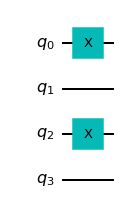

In [64]:
from qiskit_nature.circuit.library import HartreeFock

##############################
# Provide your code here

init_state = HartreeFock(num_spin_orbitals=num_SO, num_particles=(1,1), qubit_converter=qubit_converter)

##############################

init_state.draw()

### 5. Ansatz

One of the most important choices is the quantum circuit that you choose to approximate your ground state.
Here is the example of qiskit circuit library that contains many possibilities for making your own circuit.

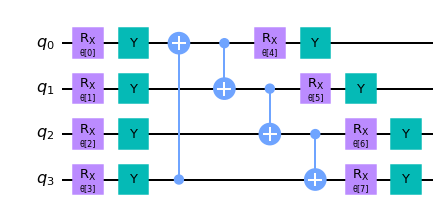

In [66]:
from qiskit.circuit.library import EfficientSU2, TwoLocal, NLocal, PauliTwoDesign
from qiskit_nature.circuit.library import UCCSD, PUCCD, SUCCD

##############################
# Provide your code here

ansatz = EfficientSU2(num_qubits, su2_gates=['rx', 'y'], entanglement='circular', reps=1)

##############################

ansatz.decompose().draw()

## Ground state energy calculation 

### Calculation using NumPy

For learning purposes, we can solve the problem exactly with the exact diagonalization of the Hamiltonian matrix so we know where to aim with VQE. Of course, the dimensions of this matrix scale exponentially in the number of molecular orbitals so you can try doing this for a large molecule of your choice and see how slow this becomes. For very large systems you would run out of memory trying to store their wavefunctions.

<center><img src="resources/vqe.png" width="600"></center>

In [68]:
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit_nature.algorithms import GroundStateEigensolver

##############################
# Provide your code here

numpy_solver = NumPyMinimumEigensolver()
numpy_ground_state_solver = GroundStateEigensolver(qubit_converter, numpy_solver)
numpy_results = numpy_ground_state_solver.solve(es_problem)

##############################

exact_energy = numpy_results.computed_energies[0]
print(f"Exact electronic energy: {exact_energy:.6f} Hartree\n")
print(numpy_results)

Exact electronic energy: -0.766115 Hartree

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -4043.632437386865
  - computed part:      -0.766114826773
  - ActiveSpaceTransformer extracted energy part: -4042.866322560092
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000


In [69]:
# Check your answer and submit using the following code
from qc_grader import grade_ex2c
grade_ex2c(numpy_results)

Submitting your answer for 2c. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### Calculation using VQE

The next step would be to use VQE to calculate this ground state energy and you would have found the solution to one half of your electronic problem!

In [70]:
from qiskit.providers.aer import StatevectorSimulator, QasmSimulator
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, SPSA, SLSQP

##############################
# Provide your code here

backend = StatevectorSimulator()
optimizer = COBYLA()

##############################

In [71]:
from qiskit.algorithms import VQE
from qiskit_nature.algorithms import VQEUCCFactory, GroundStateEigensolver
from jupyterplot import ProgressPlot
import numpy as np

error_threshold = 10 # mHartree

np.random.seed(5)  # fix seed for reproducibility
initial_point = np.random.random(ansatz.num_parameters)

In [ ]:
# for live plotting
pp = ProgressPlot(plot_names=['Energy'],
                  line_names=['Runtime VQE', f'Target + {error_threshold}mH', 'Target']) 

intermediate_info = {
    'nfev': [],
    'parameters': [],
    'energy': [],
    'stddev': []
}

def callback(nfev, parameters, energy, stddev):
    intermediate_info['nfev'].append(nfev)
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    intermediate_info['stddev'].append(stddev)
    pp.update([[energy, exact_energy+error_threshold/1000, exact_energy]])

##############################
# Provide your code here

vqe = VQE(ansatz=ansatz, 
          optimizer=optimizer, 
          initial_point=None, 
          gradient=None, 
          expectation=None, 
          include_custom=False, 
          max_evals_grouped=1, 
          callback=None, 
          quantum_instance=backend, 
          sort_parameters_by_name=None)
vqe_ground_state_solver = GroundStateEigensolver(qubit_converter,vqe)
vqe_results = vqe_ground_state_solver.solve(es_problem)

##############################

print(vqe_results)

In [75]:
error = (vqe_results.computed_energies[0] - exact_energy) * 1000 # mHartree
print(f'Error is: {error:.3f} mHartree')

Error is: 0.452 mHartree


In [76]:
# Check your answer and submit using the following code
from qc_grader import grade_ex2d
grade_ex2d(vqe_results)

Submitting your answer for 2d. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Excited state calculation 

### Calculation using QEOM

For the molecule of our interest we also need to compute the same but this time for the excited state of our molecular hamiltonian. Since we've already defined the system, we would now need to access the excitation energy using the quantum Equation of Motion (qEOM) algorithm which does this by solving the following pseudo-eigenvalue problem

<center><img src="resources/math-1.svg" width="400"></center>

with

<center><img src="resources/math-2.svg" width="300"></center>

where each corresponding matrix element must be measured on our quantum computer with its corresponding ground state.

To learn more, you can read up about excited state calculation with [**this tutorial**](https://qiskit.org/documentation/nature/tutorials/04_excited_states_solvers.html), and about qEOM itself from the [**corresponding paper by Ollitrault et al., 2019**](https://arxiv.org/abs/1910.12890).

In [77]:
from qiskit_nature.algorithms import QEOM

##############################
# Provide your code here  

qeom_excited_state_solver = QEOM(vqe_ground_state_solver)
qeom_results = qeom_excited_state_solver.solve(es_problem)

##############################

print(qeom_results)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -4043.631985257157
  - computed part:      -0.765662697065
  - ActiveSpaceTransformer extracted energy part: -4042.866322560092
 
=== EXCITED STATE ENERGIES ===
 
  1: 
* Electronic excited state energy (Hartree): -4043.426922729756
* Electronic excited state energy (Hartree): -4043.426922729756
> Total excited state energy (Hartree): -4043.426922729756
  2: 
* Electronic excited state energy (Hartree): -4043.395396357337
* Electronic excited state energy (Hartree): -4043.395396357337
> Total excited state energy (Hartree): -4043.395396357337
  3: 
* Electronic excited state energy (Hartree): -4043.085725064281
* Electronic excited state energy (Hartree): -4043.085725064281
> Total excited state energy (Hartree): -4043.085725064281
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: -0.000


In [78]:
# Check your answer and submit using the following code
from qc_grader import grade_ex2e
grade_ex2e(qeom_results)

Submitting your answer for 2e. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Finally, you just need to calculate the band gap or energy gap (which is the minimum amount of energy required by an electron to break free of its ground state into its excited state) by computing the difference of the two sets of energies that you have calculated.

In [79]:
bandgap = qeom_results.computed_energies[1] - qeom_results.computed_energies[0]
bandgap # in Hartree

0.20506252740138298

## Running VQE on the cloud using Qiskit Runtime

Qiskit Runtime is a new architecture offered by IBM Quantum that streamlines computations requiring many iterations. These experiments will execute significantly faster within this improved hybrid quantum/classical process.

Qiskit Runtime allows authorized users to upload their Qiskit quantum programs for themselves or others to use. A Qiskit quantum program, also called a Qiskit Runtime program, is a piece of Python code that takes certain inputs, performs quantum and maybe classical computation, interactively provides intermediate results if desired, and returns the processing results. The same or other authorized users can then invoke these quantum programs by simply passing in the required input parameters.


<center><img src="resources/qiskit-runtime1.gif" width="600"></center>

<center><img src="resources/runtime_arch.png" width="600"></center>


To run the VQE using Qiskit Runtime, we only have to do very few changes from the local VQE run and mainly have to replace the VQE class by the VQEProgram class. Both follow the same MinimumEigensolver interface and thus share the compute_minimum_eigenvalue method to execute the algorithm and return the same type of result object. Merely the signature of the initializer differs sligthly.

We start by choosing the provider with access to the Qiskit Runtime service and the backend to execute the circuits on.

For more information about Qiskit Runtime, please refer to [**VQEProgram**](https://qiskit.org/documentation/partners/qiskit_runtime/tutorials/vqe.html#Runtime-VQE:-VQEProgram) and [**Leveraging Qiskit Runtime**](https://qiskit.org/documentation/nature/tutorials/07_leveraging_qiskit_runtime.html) tutorials.

In [81]:
from qc_grader.util import get_challenge_provider
provider = get_challenge_provider()
if provider:
    backend = provider.get_backend('ibmq_qasm_simulator')

In [ ]:
from qiskit_nature.runtime import VQEProgram

error_threshold = 10 # mHartree

# for live plotting
pp = ProgressPlot(plot_names=['Energy'],
                  line_names=['Runtime VQE', f'Target + {error_threshold}mH', 'Target']) 

intermediate_info = {
    'nfev': [],
    'parameters': [],
    'energy': [],
    'stddev': []
}

def callback(nfev, parameters, energy, stddev):
    intermediate_info['nfev'].append(nfev)
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    intermediate_info['stddev'].append(stddev)
    pp.update([[energy,exact_energy+error_threshold/1000, exact_energy]])

##############################
# Provide your code here 

optimizer = {
    'name': 'QN-SPSA',  # leverage the Quantum Natural SPSA
    # 'name': 'SPSA',  # set to ordinary SPSA
    'maxiter': 100,
}
    
runtime_vqe = VQEProgram(ansatz=ansatz, 
                         optimizer=optimizer, 
                         initial_point=None, 
                         provider=None, 
                         backend=backend, 
                         shots=1024, 
                         measurement_error_mitigation=False, 
                         callback=None, 
                         store_intermediate=False)

##############################

<div class="alert alert-block alert-success">

**Challenge 2f grading**
    
The grading for this exercise is slightly different from the previous exercises. 
    
1. You will first need to use `prepare_ex2f` to submit a runtime job to IBM Quantum (to run on a simulator), using `runtime_vqe (VQEProgram)`, `qubit_converter (QubitConverter)`, `es_problem (ElectronicStructureProblem)`. Depending on the queue, the job can take up to a few minutes to complete. Under the hood, the `prepare_ex2f` does the following:
```python
runtime_vqe_groundstate_solver = GroundStateEigensolver(qubit_converter, runtime_vqe)
runtime_vqe_result = runtime_vqe_groundstate_solver.solve(es_problem)
```
    
2. After the job has completed, you can use `grade_ex2f` to check the answer and submit.

In [83]:
# Submit a runtime job using the following code
from qc_grader import prepare_ex2f
runtime_job = prepare_ex2f(runtime_vqe, qubit_converter, es_problem)

You are not using the challenge provider. Overwriting provider...
Starting experiment. Please wait...
You may monitor the job (id: c5vd6kl0p3h5hl46ji50) status and proceed to grading when it successfully completes.


In [84]:
# Check your answer and submit using the following code
from qc_grader import grade_ex2f
grade_ex2f(runtime_job)

Submitting your answer for 2f. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [85]:
print(runtime_job.result().get("eigenvalue"))

(-0.7599510703802916+0j)


Congratulations! You have submitted your first Qiskit Runtime program and passed the exercise.

But the fun is not over! We have reserved a dedicated quantum system for the quantum challenge. As bonus exercise (not graded), you can try your hands on submitting a VQE runtime job to a real quantum system! 

<div class="alert alert-block alert-success">

**Running VQE on a real quantum system (Optional)**
    
We have reserved a dedicated quantum system [`ibm_perth`](https://quantum-computing.ibm.com/services?services=systems&system=ibm_perth) for this challenge. Please follow the steps below to submit runtime job on the real quantum system.
    
1. Update backend selection to `ibm_perth` and pass it to `runtime_vqe` again
    ```python
    backend = provider.get_backend('ibm_perth')
    runtime_vqe = VQEProgram(...
                             backend=backend, 
                             ...)
    ```
2. Set `real_device` flag in `prepare_ex2f` to `True`.
3. Run `prepare_ex2f` to submit a runtime job to `ibm_perth`.

</div>

<div class="alert alert-block alert-danger">

Note: Qiskit runtime speeds up VQE by up to 5 times. However, each runtime job can still take 30 ~ 60 minutes of quantum processor time. Therefore, **the queue time for completing a job can be hours or even days**, depending on how many participants are submitting jobs. 

To ensure a pleasant experience for all participants, please only submit a job to the real quantum system after trying with these settings using the simulator:
1. Consider using `PartiyMapper` and set `two_qubit_reduction=True` to reduce number of qubits to 2 and make the VQE program converge to ground state energy faster (with lower number of iterations).
1. Limit optimizer option `maxiter=100` or less. Use the simulator runs to find an optimal low number of iterations.
1. Verify your runtime program is correct by passing `grade_ex2f` with simulator as backend.
1. Limit your jobs to only 1 job per participant to allow more participants to try runtime on a real quantum system.
    
Don't worry if your job is getting too long to execute or it can't be executed before the challenge ends. This is an optional exercise. You can still pass all challenge exercises and get a digital badge without running a job on the real quantum system.
</div>

In [ ]:
# Please change backend to ibm_perth before running the following code
runtime_job_real_device = prepare_ex2f(runtime_vqe, qubit_converter, es_problem, real_device=True)

In [ ]:
print(runtime_job_real_device.result().get("eigenvalue"))

## Additional information

**Created by:** Junye Huang, Samanvay Sharma

**Version:** 1.0.0